In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from utils.helper import fn_plot_tf_hist

In [1]:
###------------------------------
### global variables
##-----------------

outDir = 'models' # store output here 
inpDir = 'input' # get input from here
modelDir = 'models' # to save models
subDir = 'fifa_2019.csv' # sub dir by dataset



RANDOM_STATE = 24
np.random.RandomState(seed = RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE) # set_seed in tf
rng= np.random.default_rng(seed= RANDOM_STATE)

ALPHA = .001
TEST_SIZE = 3811 #  18147 - 256(batch_size) * 56 
BATCH_SIZE = 256 # batch size should be integral of tottal samplesa so that the distribution is equal for all the batches
EPOCHS = 200 #NO. of itersation used to optimize weights
# input and output directories

params = {'legend.fontsize' : 'medium', 
          'figure.figsize' : (15, 4),
          'axes.labelsize' : 'medium',
          'axes.titlesize' : 'large',
          'xtick.labelsize' : 'medium',
          'ytick.labelsize' : 'medium',
         }
loss_hist = {} # creating an empty dictionary which will store loss and epoch later so that we can make loss curve later

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm

# plt.style.use('seaborn-v0_8-darkgrid')

plt.style.use('ggplot')

NameError: name 'np' is not defined

In [139]:
os.path.join(inpDir, subDir)

'..\\input\\fifa_2019.csv'

In [141]:
## loading dataset
data_df = pd.read_csv(os.path.join(inpDir, subDir)) # os.path.join(inpDir,subDir) =  'input\\fifa_2019.csv'
data_df.head()

FileNotFoundError: [Errno 2] No such file or directory: '..\\input\\fifa_2019.csv'

### EDA

In [5]:
data_df['Age'].value_counts()

Age
21    1423
26    1387
24    1358
22    1340
23    1332
25    1319
20    1240
27    1162
28    1101
19    1024
29     959
30     917
18     732
31     707
32     574
33     408
34     404
17     289
35     196
36     127
37      82
16      42
38      37
39      25
40      13
41       5
44       2
45       1
42       1
Name: count, dtype: int64

 EDA
1. remove Null from position
2. Read unique values from the columns

In [7]:
data_df['Age'].unique()

array([31, 33, 26, 27, 32, 25, 29, 28, 24, 30, 19, 40, 22, 23, 34, 35, 36,
       37, 21, 18, 20, 39, 41, 17, 38, 45, 42, 16, 44], dtype=int64)

In [8]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18207.0,9103.000000,5256.052511,0.0,4551.5,9103.0,13654.5,18206.0
ID,18207.0,214298.338606,29965.244204,16.0,200315.5,221759.0,236529.5,246620.0
Age,18207.0,25.122206,4.669943,16.0,21.0,25.0,28.0,45.0
Overall,18207.0,66.238699,6.908930,46.0,62.0,66.0,71.0,94.0
Potential,18207.0,71.307299,6.136496,48.0,67.0,71.0,75.0,95.0
Special,18207.0,1597.809908,272.586016,731.0,1457.0,1635.0,1787.0,2346.0
International Reputation,18159.0,1.113222,0.394031,1.0,1.0,1.0,1.0,5.0
Weak Foot,18159.0,2.947299,0.660456,1.0,3.0,3.0,3.0,5.0
Skill Moves,18159.0,2.361308,0.756164,1.0,2.0,2.0,3.0,5.0
Jersey Number,18147.0,19.546096,15.947765,1.0,8.0,17.0,26.0,99.0


In [9]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [10]:
for col in data_df.columns:
    unq = (col, data_df[col].unique())
    print(f'{col}, # :{len(unq[1])}, Values: {unq}')

Unnamed: 0, # :18207, Values: ('Unnamed: 0', array([    0,     1,     2, ..., 18204, 18205, 18206], dtype=int64))
ID, # :18207, Values: ('ID', array([158023,  20801, 190871, ..., 241638, 246268, 246269], dtype=int64))
Name, # :17194, Values: ('Name', array(['L. Messi', 'Cristiano Ronaldo', 'Neymar Jr', ..., 'B. Worman',
       'D. Walker-Rice', 'G. Nugent'], dtype=object))
Age, # :29, Values: ('Age', array([31, 33, 26, 27, 32, 25, 29, 28, 24, 30, 19, 40, 22, 23, 34, 35, 36,
       37, 21, 18, 20, 39, 41, 17, 38, 45, 42, 16, 44], dtype=int64))
Photo, # :18207, Values: ('Photo', array(['https://cdn.sofifa.org/players/4/19/158023.png',
       'https://cdn.sofifa.org/players/4/19/20801.png',
       'https://cdn.sofifa.org/players/4/19/190871.png', ...,
       'https://cdn.sofifa.org/players/4/19/241638.png',
       'https://cdn.sofifa.org/players/4/19/246268.png',
       'https://cdn.sofifa.org/players/4/19/246269.png'], dtype=object))
Nationality, # :164, Values: ('Nationality', array(['A

In [11]:
df1 = data_df.select_dtypes(exclude='object')

In [12]:
# 'International Reputation', 'Unnamed: 0', 
for col in df1.columns:
    unq = (col, df1[col].unique())
    print(f'{col}, # :{len(unq[1])}, Values: {unq}')

Unnamed: 0, # :18207, Values: ('Unnamed: 0', array([    0,     1,     2, ..., 18204, 18205, 18206], dtype=int64))
ID, # :18207, Values: ('ID', array([158023,  20801, 190871, ..., 241638, 246268, 246269], dtype=int64))
Age, # :29, Values: ('Age', array([31, 33, 26, 27, 32, 25, 29, 28, 24, 30, 19, 40, 22, 23, 34, 35, 36,
       37, 21, 18, 20, 39, 41, 17, 38, 45, 42, 16, 44], dtype=int64))
Overall, # :48, Values: ('Overall', array([94, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77,
       76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60,
       59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46],
      dtype=int64))
Potential, # :47, Values: ('Potential', array([94, 93, 92, 91, 90, 89, 95, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79,
       78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62,
       61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 48], dtype=int64))
Special, # :1422, Values: ('Special', array([2202, 2228, 2143, ...,  778,  

<Axes: >

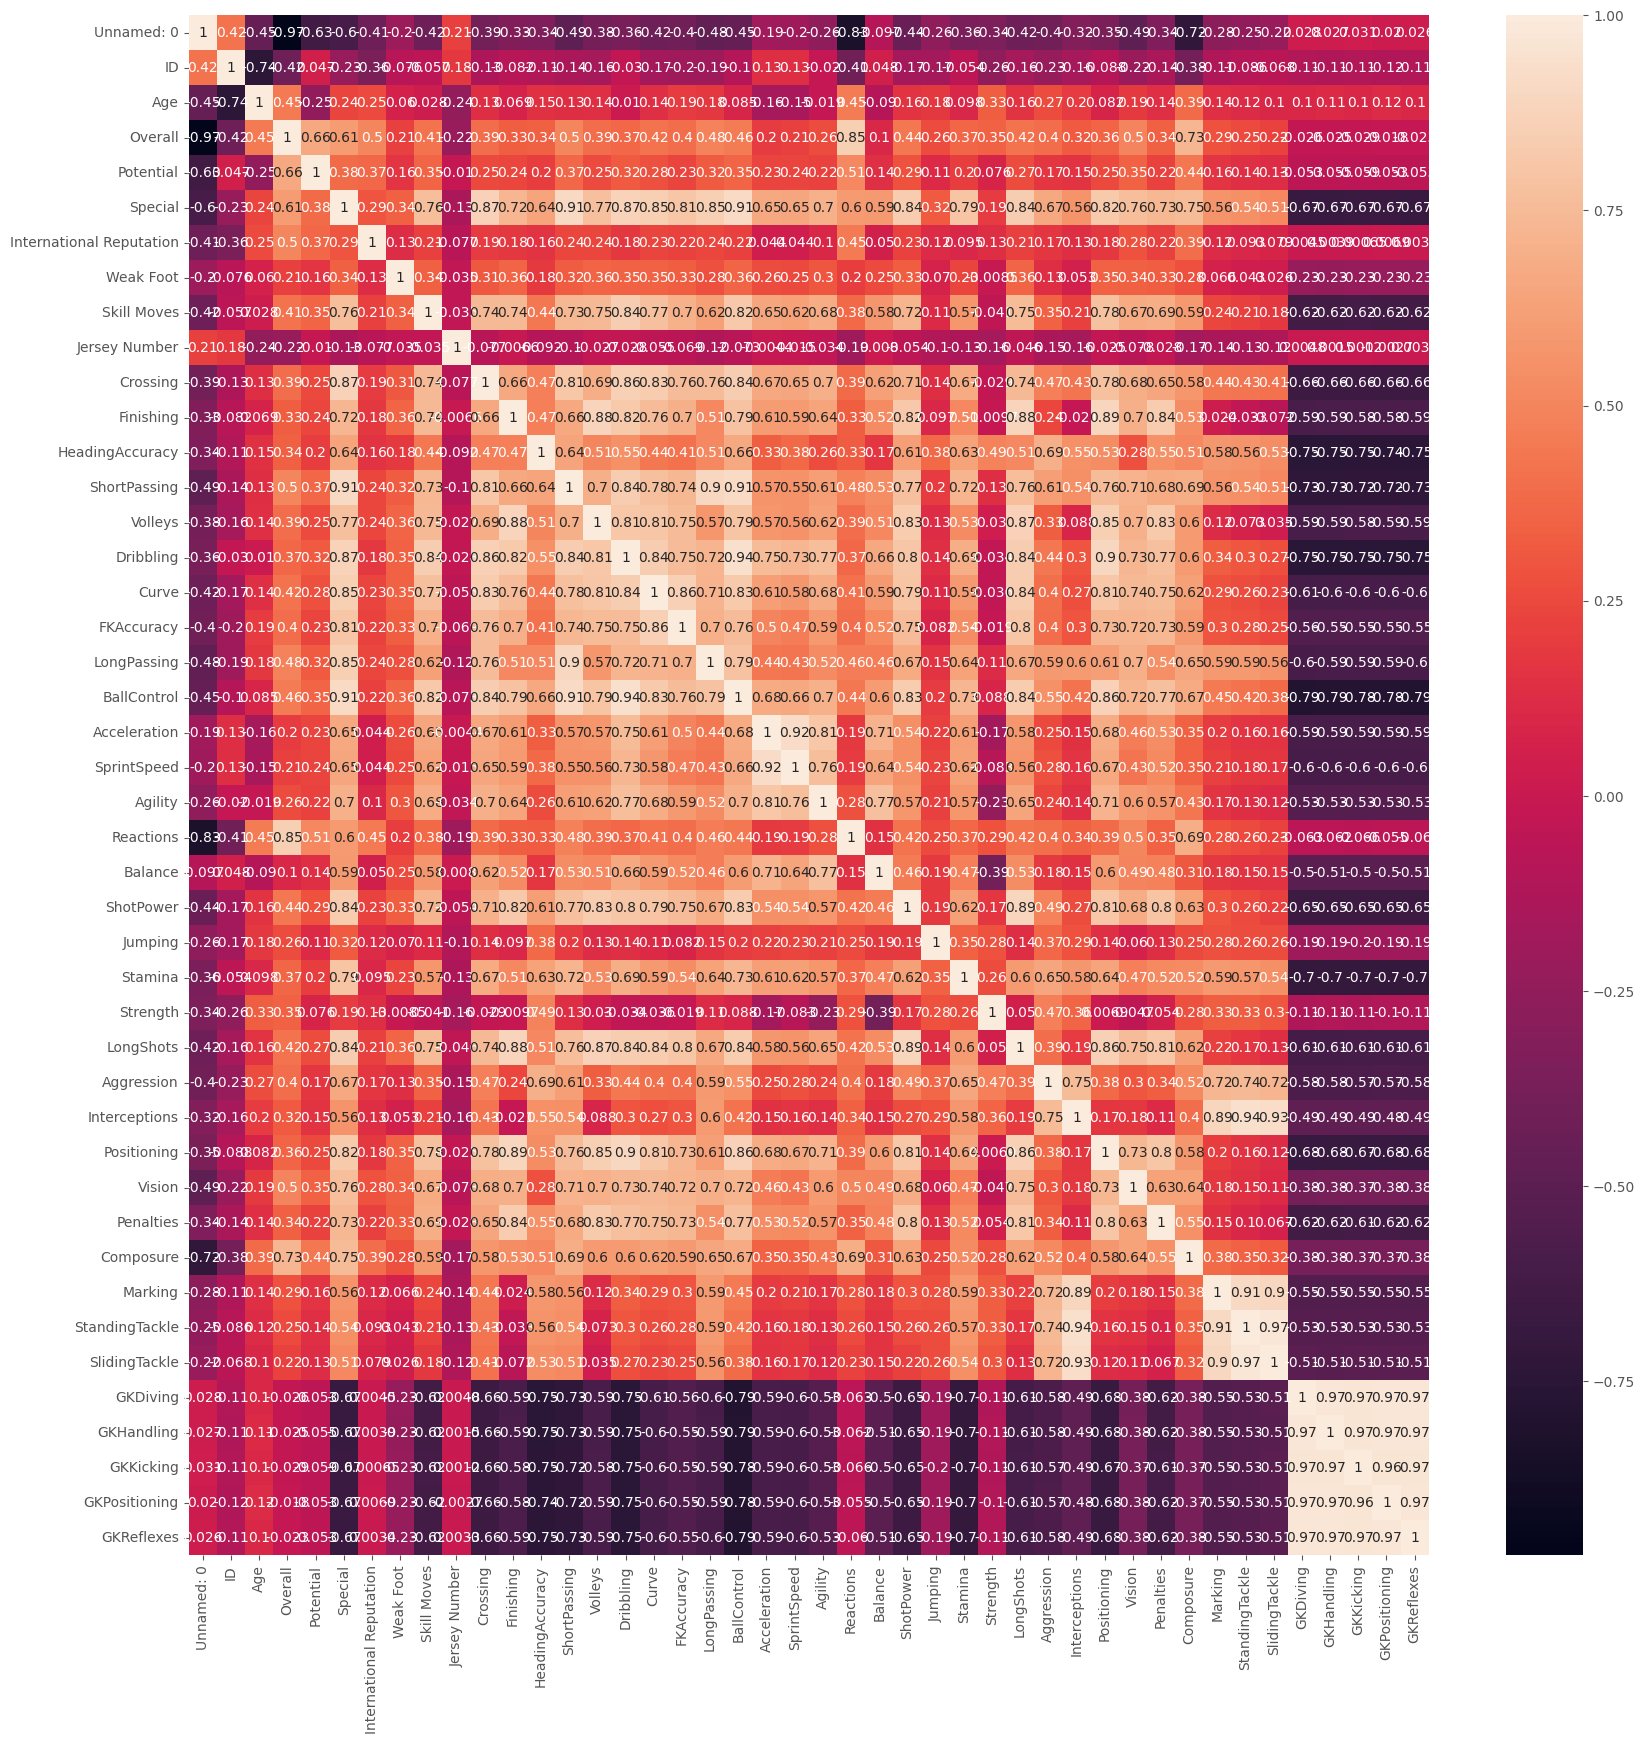

In [13]:
import seaborn as sns
plt.figure(figsize = (20,20))
sns.heatmap(df1.corr(), annot = True)

### selecting columns

In [15]:
df1.shape

(18207, 44)

In [65]:
rel_cols=["Position","Finishing","HeadingAccuracy","ShortPassing","Volleys","Dribbling","Curve","FKAccuracy","LongPassing","BallControl","Acceleration",
          "SprintSpeed","Agility","Reactions","Balance","ShotPower",
          "Jumping","Stamina","Strength","LongShots","Aggression","Interceptions","Positioning","Vision","Penalties","Composure","Marking","StandingTackle",
          "GKDiving","GKHandling","GKKicking","GKPositioning","GKReflexes"]
df1 = data_df[rel_cols]


In [67]:
df1.isna().sum().sum()

1596

In [69]:
df1 = df1.dropna()

In [71]:
df1['Position'].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'], dtype=object)

In [73]:
goalkeeper = 'GK'
forward = ['ST', 'LW', 'RW', 'LF', 'RF', 'RS', 'LS', 'CF']
midfielders = ['CM', 'RCM', 'LCM', 'CDM', 'RDM', 'LDM', 'CAM', 'LAM', 'RAM', 'RM', 'LM']
defender = ['CB', 'RCB', 'LCB', 'LWB', 'RWB', 'LB', 'RB']


In [75]:
# doing encoding for Labels
df1.loc[data_df['Position'] == 'GK', 'Position'] = 0 
df1.loc[data_df['Position'].isin(defender), 'Position'] = 1
df1.loc[data_df['Position'].isin(midfielders), 'Position'] = 2
df1.loc[data_df['Position'].isin(forward), 'Position'] = 3
# df1.loc['Position'] = pd.to_numeric(df1['Position'], downcast = 'integer')

In [77]:
df1['Position'] = pd.to_numeric(df1['Position'], downcast = 'integer')

In [79]:
df1['Position'].unique()

array([3, 0, 2, 1], dtype=int8)

In [81]:
class_labels = {0: 'Goalkeeper', 1:'Defender', 2: 'MidFielder', 3 : 'Forward'}

In [83]:
X = df1.drop('Position', axis = 1)
y = df1.Position

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = RANDOM_STATE, test_size = TEST_SIZE, stratify = y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14336, 32), (3811, 32), (14336,), (3811,))

In [99]:
type(X_train)

pandas.core.frame.DataFrame

In [101]:
sc = StandardScaler().set_output(transform = 'pandas')

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)


In [103]:
model = tf.keras.Sequential([
    tf.keras.Input(shape = (X_train.shape[1],), name = 'input' ),
    tf.keras.layers.Dense(18, activation = tf.nn.silu, name = 'fc_1'),
    tf.keras.layers.Dense(4, name = 'output')
])

In [105]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)


In [107]:
model.compile(optimizer = 'adam', loss= loss_fn, metrics= ['accuracy'])

In [109]:
history =  model.fit(x= X_train, y=y_train, validation_data= [X_test, y_test],
                     epochs= EPOCHS,
                     batch_size = BATCH_SIZE) # adding batchsize (mini batch-size gradient)

Epoch 1/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2538 - loss: 1.4838 - val_accuracy: 0.6539 - val_loss: 0.9337
Epoch 2/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6829 - loss: 0.8618 - val_accuracy: 0.7641 - val_loss: 0.6854
Epoch 3/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7722 - loss: 0.6466 - val_accuracy: 0.7909 - val_loss: 0.5562
Epoch 4/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7966 - loss: 0.5333 - val_accuracy: 0.8043 - val_loss: 0.4881
Epoch 5/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8123 - loss: 0.4712 - val_accuracy: 0.8153 - val_loss: 0.4473
Epoch 6/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8246 - loss: 0.4320 - val_accuracy: 0.8226 - val_loss: 0.4188
Epoch 7/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8356 - loss: 0.4039 - val_accuracy: 0.8326 - val_loss: 0.3967
Epoch 8/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8437 - loss: 0.3822 - val_accuracy: 0.8426 - v

,accuracy,loss,val_accuracy,val_loss
0,0.410086,1.247017,0.653897,0.933688
1,0.719587,0.797002,0.764104,0.685444
2,0.780483,0.612585,0.790869,0.556186
3,0.797782,0.515657,0.804251,0.488120
4,0.812919,0.461345,0.815272,0.447315


<Axes: >

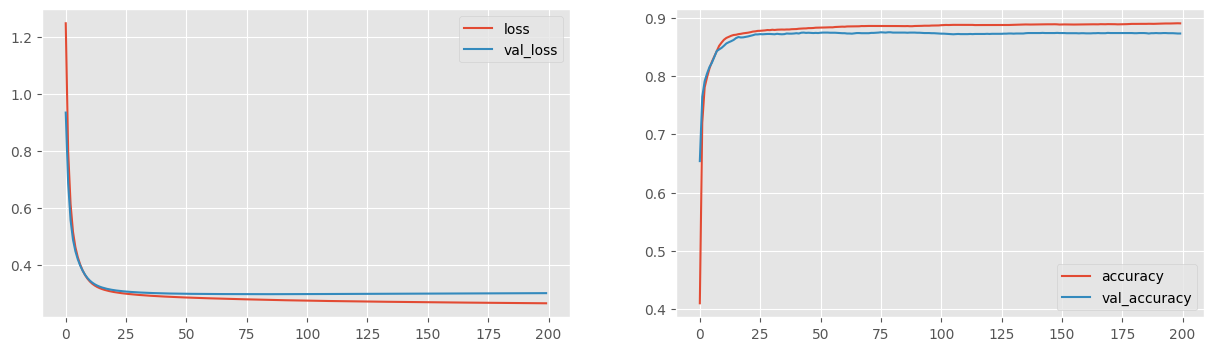

In [110]:
hist_df= pd.DataFrame(history.history)
display(hist_df.head())
fig, ax = plt.subplots(1,2)

# the required plot
hist_df.plot(y= ['loss','val_loss'], ax= ax[0])
hist_df.plot(y= ['accuracy','val_accuracy'], ax= ax[1])

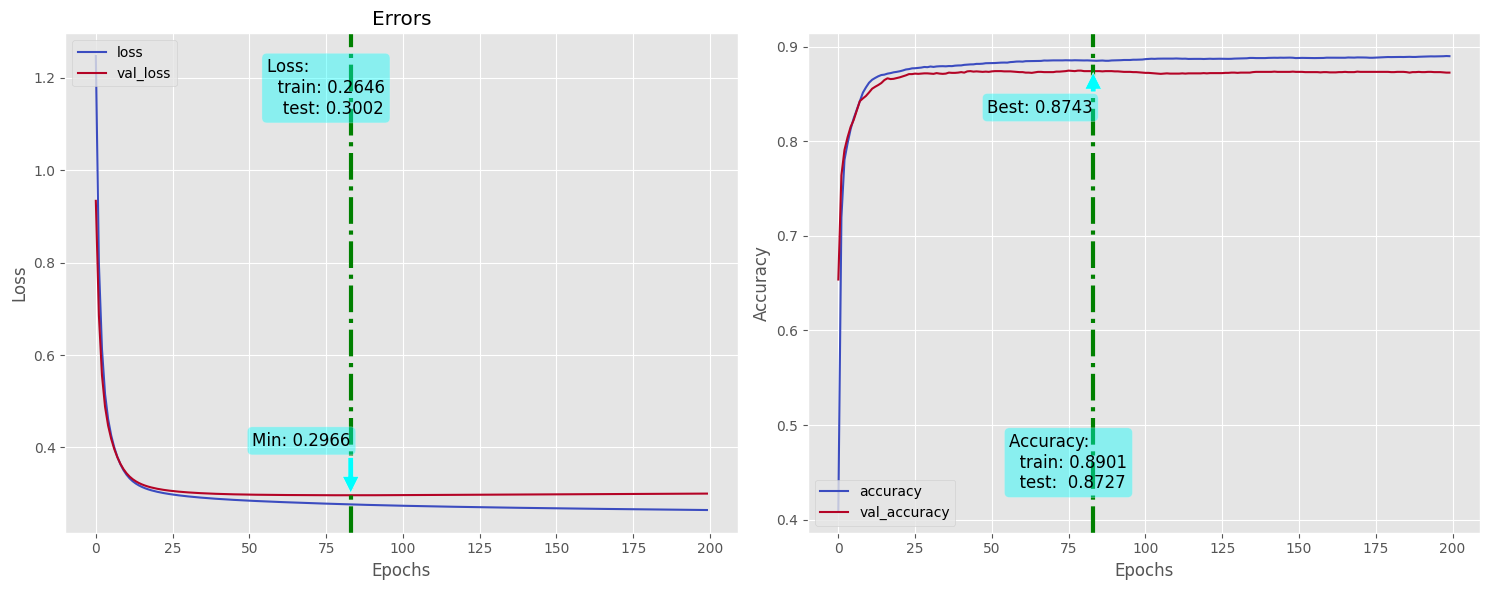

In [111]:
fn_plot_tf_hist(hist_df=hist_df) #Using function

In [112]:
y_pred = model.predict(X_train)
accuracy_score(y_train, y_pred.argmax(axis=1))

448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


0.8903459821428571

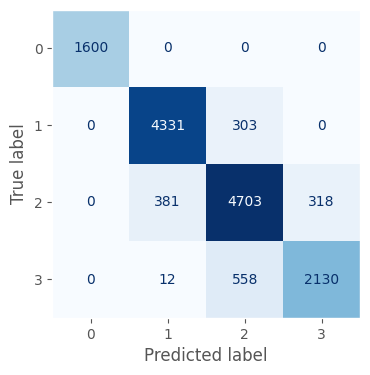

In [113]:
cm = confusion_matrix(y_train, y_pred.argmax(axis=1))
plost = ConfusionMatrixDisplay(cm, display_labels = [0,1, 2, 3])
fig, ax = plt.subplots(figsize = (4,4))

plost.plot(ax = ax,cmap = 'Blues',  colorbar = False)
ax.grid(False)

In [114]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred.argmax(axis = 1))

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


0.8727368144843873

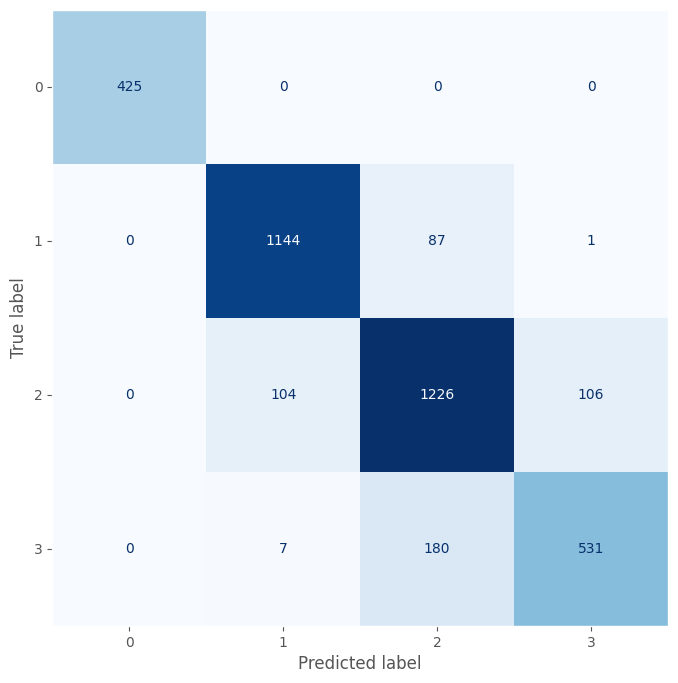

In [115]:
cm = confusion_matrix(y_test, y_pred.argmax(axis = 1))
plat = ConfusionMatrixDisplay(cm, display_labels = [0, 1, 2, 3])
fig, ax =plt.subplots(figsize = (8, 8))

plat.plot(ax = ax, cmap = 'Blues', colorbar = False)
ax.grid(False)